In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.codonalign.codonseq import CodonSeq

from calculate import channel_capacity

/opt/homebrew/lib/python3.11/site-packages/Bio/codonalign/__init__.py:23: BiopythonExperimentalWarning: Bio.codonalign is an experimental module which may undergo significant changes prior to its future official release.
  warnings.warn(


In [ ]:
TAXID=10090
error_level = 4
DATA_FILENAME = f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-data/Q-{TAXID}-p{error_level}.csv'

In [ ]:
df = pd.read_csv(DATA_FILENAME)

In [ ]:
len(df)

97465

In [ ]:
df['information'].mean()

4.084167530980684

[Text(0.5, 0, 'Total variation distance'),
 Text(0, 0.5, ''),
 [Text(0, 0.0, ''),
  Text(0, 500.0, ''),
  Text(0, 1000.0, ''),
  Text(0, 1500.0, ''),
  Text(0, 2000.0, ''),
  Text(0, 2500.0, ''),
  Text(0, 3000.0, '')]]

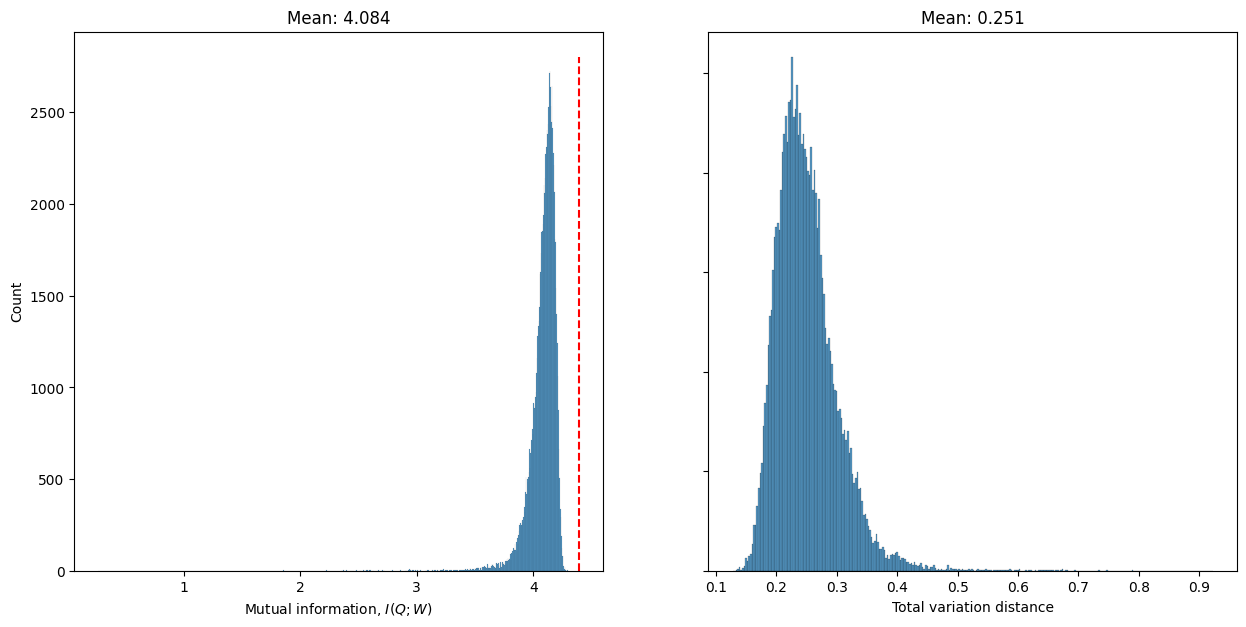

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

infot_g = sns.histplot(data=df, x='information', ax=ax[0])
ax[0].vlines(x=channel_capacity(p=10**(-error_level)), ymin=0, ymax=2800, colors='r', linestyles='dashed')
# ax[0].set_xticks([2.5+.25*i for i in range(9)])
ax[0].set_title(f'Mean: {df["information"].mean():.3f}')

distance_g = sns.histplot(data=df, x='distance from capacity achieving', ax=ax[1])
# ax[1].set_xticks([.1 + .1*i for i in range(7)])
ax[1].set_title(f'Mean: {df["distance from capacity achieving"].mean():.3f}')

infot_g.set(xlabel='Mutual information, $I(Q; W)$')
distance_g.set(xlabel='Total variation distance', ylabel='', yticklabels=[])
# fig.suptitle(f'{TAXID=}')

In [ ]:
fig.savefig(f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-figures/info-plot-{TAXID}-p{error_level}.eps', format='eps', dpi=300)

2024-08-29 16:31:54,322 :: [WARNING ] :: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
TAXIDS = [562, 3702, 4932, 7227, 10090]
ERROR_LEVELS = [1, 2, 3, 4]
dfs = []
for taxid in TAXIDS:
  for error_level in ERROR_LEVELS:
    try:
      df = pd.read_csv(f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-data/Q-{taxid}-p{error_level}.csv')
    except Exception as e:
      print(e)
      continue
    df['taxid'] = taxid
    df['error_level'] = error_level
    dfs.append(df)

master_df = pd.concat(dfs)

In [ ]:
master_df[(master_df['error_level'] == 4)][['taxid', 'distance from capacity achieving']].groupby('taxid')['distance from capacity achieving'].mean().round(3)

taxid
562      0.264
3702     0.251
4932     0.254
7227     0.248
10090    0.251
Name: distance from capacity achieving, dtype: float64

In [ ]:
hue_order = master_df[master_df['error_level'] == 4][['taxid', 'information']].groupby('taxid').median(numeric_only=True).sort_values('information').index

In [ ]:
master_df.head()

,id,description,information,distance from capacity achieving,taxid,error_level
0,lcl|NZ_KQ235739.1_cds_WP_000893994.1_13,lcl|NZ_KQ235739.1_cds_WP_000893994.1_13 [gene=...,3.012277,0.375804,562,1
1,lcl|NZ_KQ235739.1_cds_WP_001296612.1_33,lcl|NZ_KQ235739.1_cds_WP_001296612.1_33 [locus...,3.322478,0.231951,562,1
2,lcl|NZ_KQ235739.1_cds_WP_000183349.1_9,lcl|NZ_KQ235739.1_cds_WP_000183349.1_9 [gene=y...,3.252783,0.262920,562,1
3,lcl|NZ_KQ235739.1_cds_WP_000078429.1_23,lcl|NZ_KQ235739.1_cds_WP_000078429.1_23 [locus...,3.178619,0.307332,562,1
4,lcl|NZ_KQ235739.1_cds_WP_000897302.1_31,lcl|NZ_KQ235739.1_cds_WP_000897302.1_31 [locus...,3.254910,0.273352,562,1


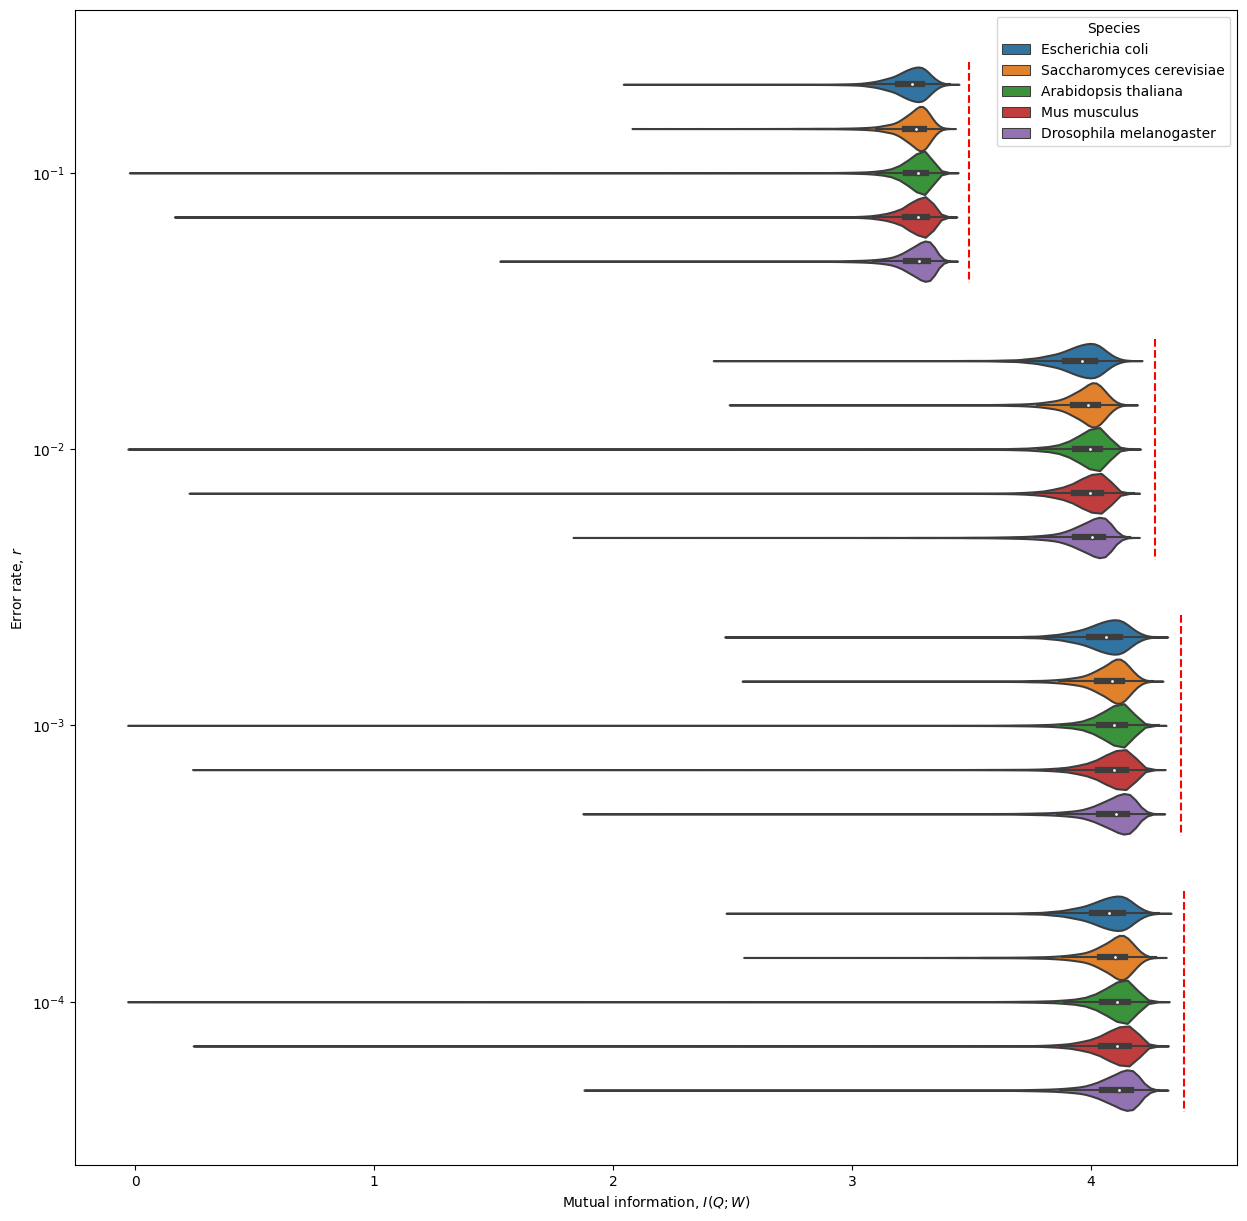

In [ ]:
# from matplotlib.lines import Line2D
box_width = 0.4

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
y_values = (ERROR_LEVELS)
g = sns.violinplot(
  ax=ax,
  data=master_df,
  x='information',
  y='error_level',
  hue='taxid',
  palette='tab10',
  # showfliers=False,
  orient='h',
  hue_order=hue_order,
  order=y_values,
  legend=False,
  inner='box',
  # showmeans=True,
  # meanprops={
  #   "marker":"-",
  #   "markerfacecolor":"white",
  #   "markeredgecolor":"black",
  #   "markersize":"3",
  # },
)

for i, y in enumerate(y_values):
  x_value = channel_capacity(p=10.**(-y))
  g.axes.vlines(x=x_value, ymin=i - box_width, ymax=i + box_width, color='r', linestyle='--')
#
# custom_lines = [Line2D([0], [0], color='r', lw=2, linestyle='--')]
#
# handles, labels = g.get_legend_handles_labels()
#
# legend1 = plt.legend(handles=handles, labels=labels, title='taxid', loc='upper left')
#
# custom_line = Line2D([0], [0], color='r', lw=2, linestyle='--')
# custom_legend = plt.legend([custom_line], ['Channel capacity'], loc='lower right')
#
# plt.gca().add_artist(legend1)
g.set(xlabel='Mutual information, $I(Q; W)$', ylabel='Error rate, $r$', yticklabels=[f"$10^{{-{el}}}$" for el in ERROR_LEVELS])
# g.axes.get_legend().set_visible(False)
# dist_g.axes.set_visible(False)
# dist_g.legend()
# plt.gca().set_visible(False)

# Only display the legend
#plt.legend()
taxid_to_name = {
  562: 'Escherichia coli',
  4932: 'Saccharomyces cerevisiae',
  3702: 'Arabidopsis thaliana',
  7227: 'Drosophila melanogaster',
  10090: 'Mus musculus',
}
legend = g.legend_
legend.set_title('Species')
for t in legend.texts:
  t.set_text(taxid_to_name[int(t.get_text())])

In [ ]:
master_df[master_df['error_level'] == 4][['taxid', 'information']].groupby('taxid').median(numeric_only=True)

,information
taxid,
562,4.076037
3702,4.109338
4932,4.101858
7227,4.117045
10090,4.109683


In [ ]:
g.figure.savefig(f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-figures/info-box-plot-with-legend.eps', format='eps', dpi=300)

2024-08-29 16:48:30,054 :: [WARNING ] :: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


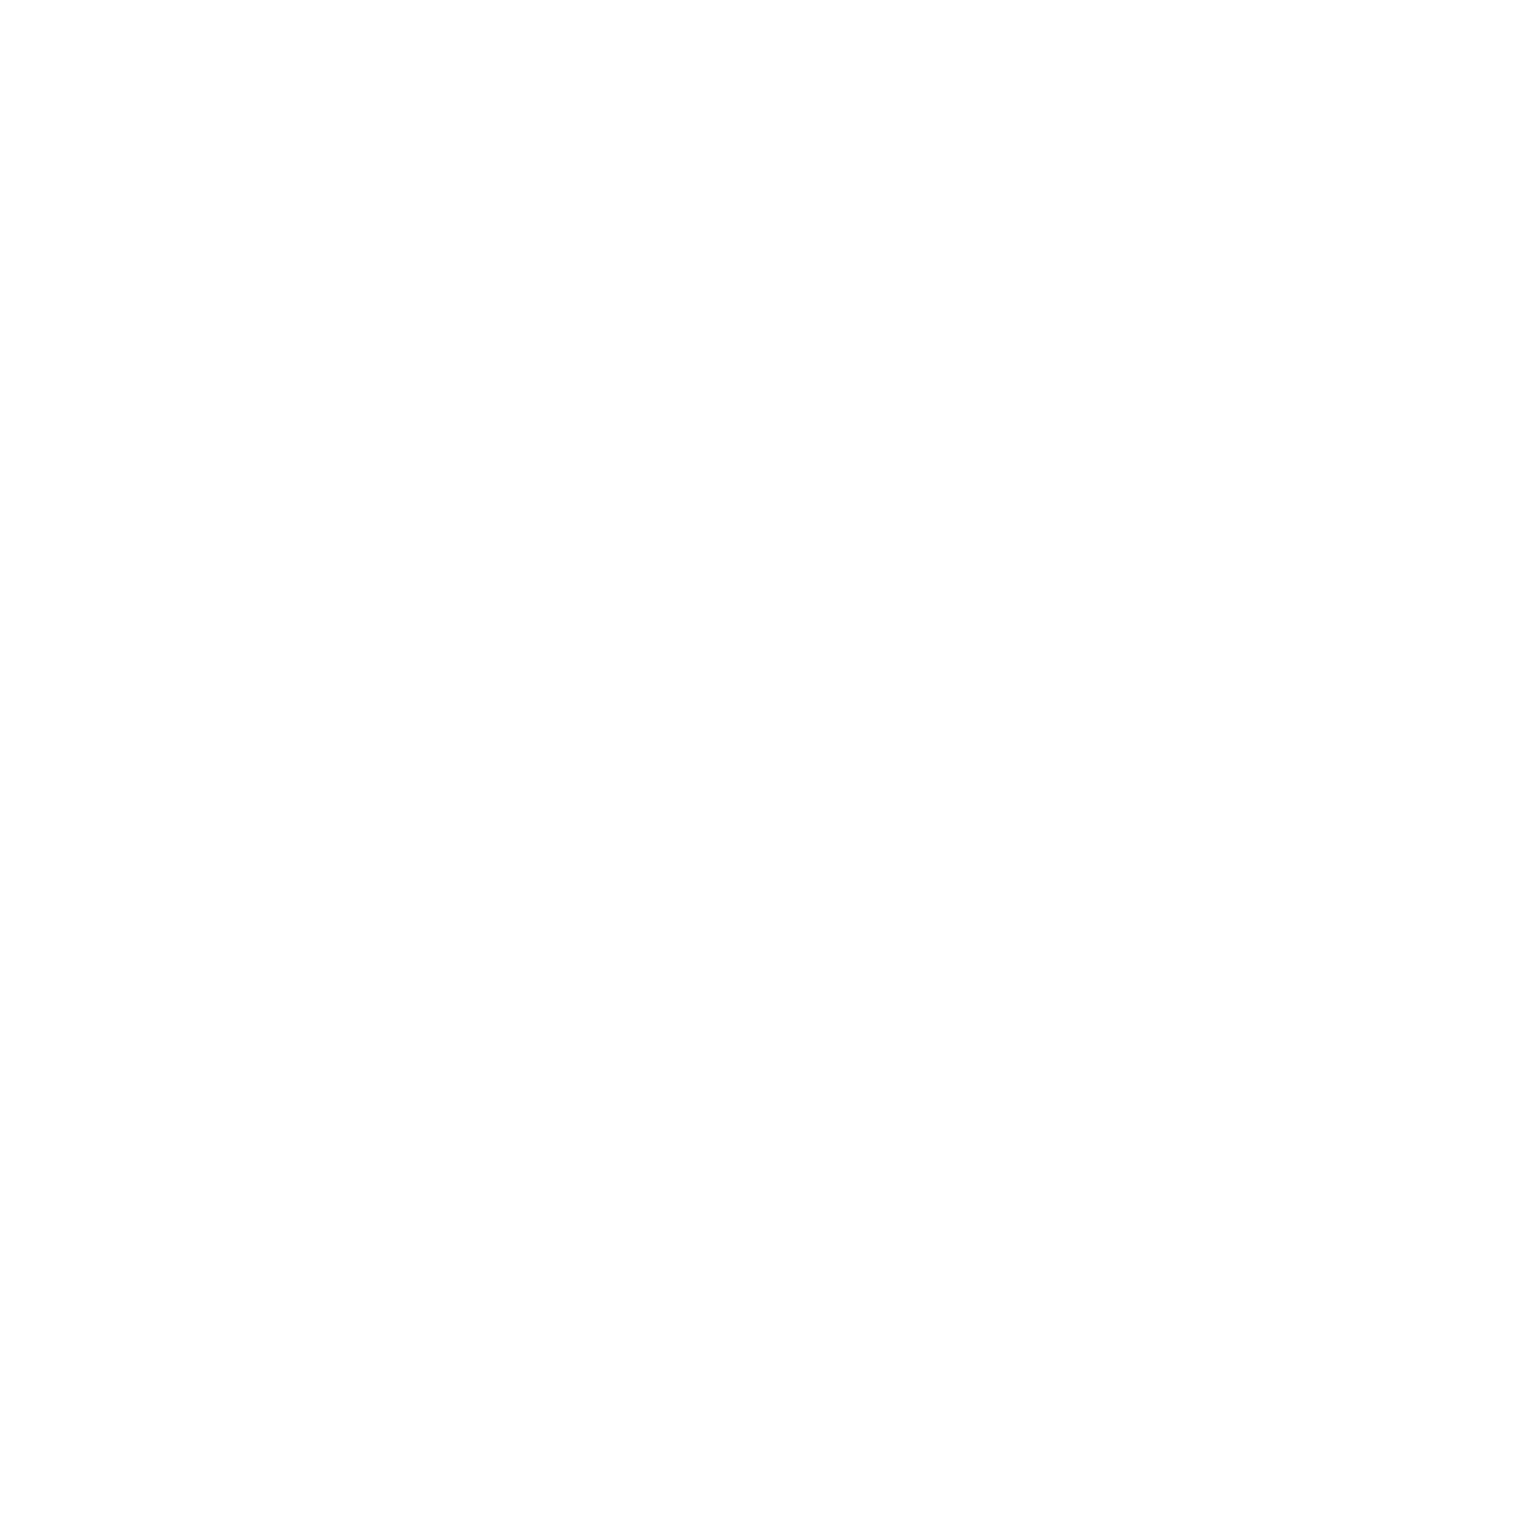

In [ ]:
# dist_g = sns.boxplot(
#   data=master_df[master_df['error_level'] == 4],
#   x='distance from capacity achieving',
#   y='error_level',
#   hue='taxid',
#   palette='tab10',
#   showfliers=False,
#   hue_order=master_df[master_df['error_level'] == 4][['taxid', 'information']].groupby('taxid').median(numeric_only=True).sort_values('information').index,
#   # order=x_values,
#   showmeans=True,
#   meanprops={
#     "marker":"o",
#     "markerfacecolor":"white",
#     "markeredgecolor":"black",
#     "markersize":"3",
#   },
# )

box_width = 0.4

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
y_values = (ERROR_LEVELS)
dist_g = sns.violinplot(
  ax=ax,
  data=master_df[master_df['error_level'] == 4],
  x='distance from capacity achieving',
  y='error_level',
  hue='taxid',
  palette='tab10',
  # showfliers=False,
  orient='h',
  hue_order=hue_order,
  #order=y_values,
  # legend=False,
  inner='box',
  gridsize=2000,
  # showmeans=True,
  # meanprops={
  #   "marker":"-",
  #   "markerfacecolor":"white",
  #   "markeredgecolor":"black",
  #   "markersize":"3",
  # },
)

dist_g.set(xlabel='Total variation distance', ylabel='', yticklabels=[''])
# dist_g.axes.get_legend().set_visible(False)
# dist_g.axes.set_visible(False)
# dist_g.legend()
# plt.legend()
# plt.gca().set_visible(False)

In [ ]:
dist_g.figure.savefig(f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-figures/tv-dist-box-plot.eps', format='eps', dpi=300)

In [ ]:
def g(r):
  q = 1-r
  return 1/64 * (
        2*q*np.log2(1280*q/(43*r+20))
      + (63*r/10)*np.log2(64*r/(43*r+20))
      + 18*q*np.log2(640*q/(11*r+20))
      + (279*r/10)*np.log2(32*r/(11*r+20))
      + 6*q*np.log2(1280*q/(r+60))
      + (61*r/10)*np.log2(64*r/(r+60))
      + 20*q*np.log2(64*q/(4-r))
      + 15*r*np.log2(16*r/(5*(4-r)))
      + 18*q*np.log2((640*q)/(60-31*r))
      + (87*r/10)*np.log2(32*r/(60-31*r))
  )

def exact(r, p=None):
  py = p if p is not None else (lambda _: 1/21)
  a = r/20
  b = 1-21*r/20
  c = -(1-r)*np.log2(1-r)-r*np.log2(r/20)
  return -c-sum(
    (a+b*py(y)) * np.log2(a+b*py(y))
    for y in range(21)
  )

def djordjevic(r):
  return np.log2(61) - 1.68 + 6.509*r *np.log2(0.4594*r)

In [ ]:
rs = np.linspace(1e-6, 1, 1000, endpoint=False)
data = []

for calc, name in zip((exact, g, djordjevic), ('I', 'g', 'Djordjevic')):
  for r in rs:
    data.append((r, calc(r), name))

df = pd.DataFrame(data, columns=['r', 'I', 'Function'])

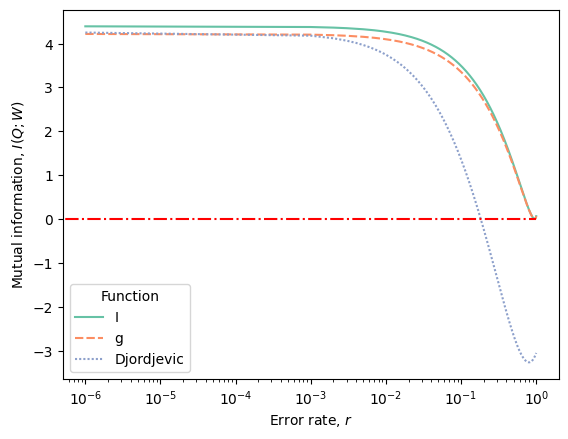

In [ ]:
r_plot = sns.lineplot(
  data=df,
  y='I',
  x='r',
  hue='Function',
  palette='Set2',
  style='Function',
  markers=False,
  legend='full',
  # plot_kws=dict(edgecolor="none")
  # marker="$\circ$",
)
r_plot.set(xlabel='Error rate, $r$', ylabel='Mutual information, $I(Q; W)$', xscale='log')
r_plot.axes.hlines(y=0, xmin=0, xmax=1, color='r', linestyle='dashdot')

In [ ]:
r_plot.figure.savefig(f'/Users/david/Dropbox/experiments/ribosome-capacity/pretty-figures/r-plot.eps', format='eps', dpi=300)

2024-08-29 16:20:35,660 :: [WARNING ] :: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
